In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
first_date = session.query(measurement.date).order_by(measurement.date).first()
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print (f"First date: {first_date[0]}, Last date: {last_date[0]}")

First date: 2010-01-01, Last date: 2017-08-23


# Exploratory Climate Analysis

In [11]:
# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
year_ago

datetime.date(2016, 8, 23)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(measurement.date, func.avg(measurement.prcp)).\
          filter(measurement.date>= year_ago).\
          group_by(measurement.date).all()
prcp_data

[('2016-08-23', 0.45166666666666666),
 ('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
prcp_df = pd.DataFrame(prcp_data,columns = ["Date", "Precipitation"])
prcp_df.set_index("Date", inplace = True)
prcp_df.head()

,Precipitation
Date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000


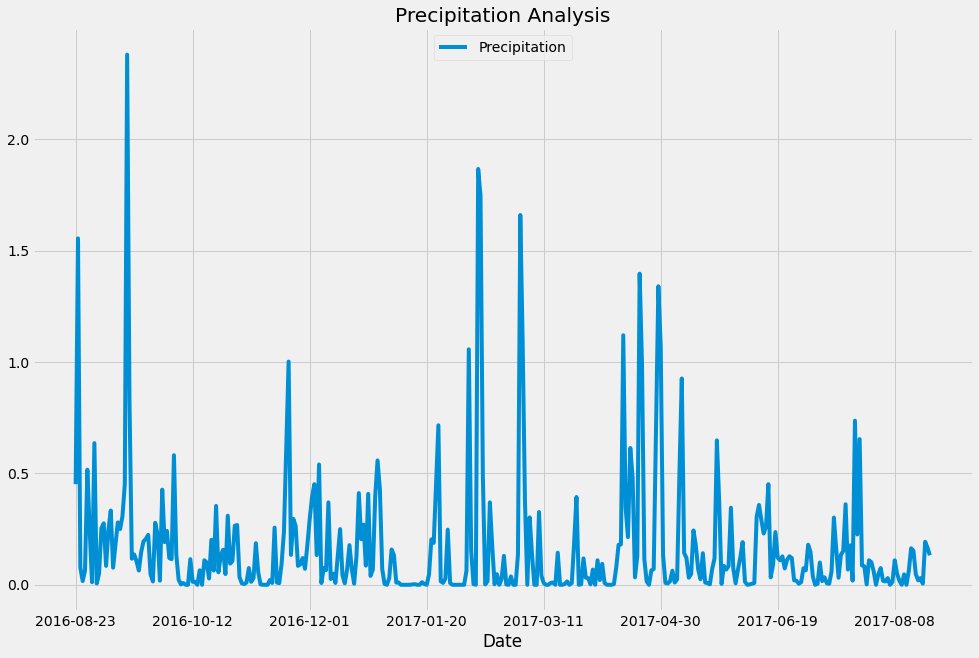

<Figure size 432x288 with 0 Axes>

In [32]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(title = "Precipitation", figsize = (15,10))
plt.title("Precipitation Analysis")
plt.legend(loc="upper center")
plt.show()
plt.savefig("Images/precipitation.png")

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [16]:
# Design a query to show how many stations are available in this dataset?
total_station = session.query(func.count(station.station)).all()
total_station

[(9,)]

In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
m_active_st = session.query(measurement.station,func.count(measurement.station)).\
              group_by(measurement.station).\
              order_by(func.count(measurement.station).desc()).all()
m_active_st

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
best_station = m_active_st[0][0]
session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
                filter(measurement.station == best_station).all()

[(54.0, 71.66378066378067, 85.0)]

In [19]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_result = session.query(measurement.station, measurement.tobs).\
                filter(measurement.station == best_station).\
                filter(measurement.date >= year_ago).all()
temp_df = pd.DataFrame(temp_result)
temp_df.rename(columns = {0: "Station", 1: "Temperature"}).head()

,Station,Temperature
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0


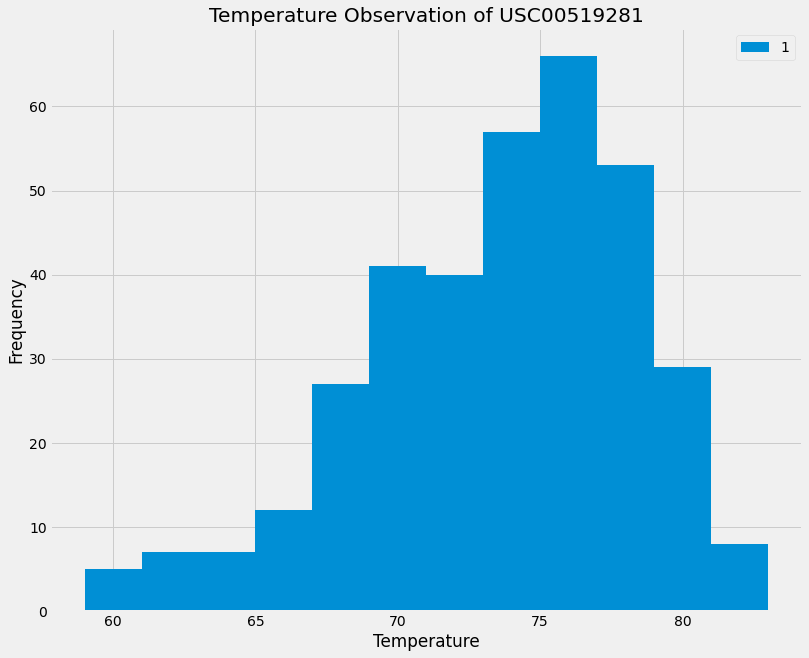

<Figure size 432x288 with 0 Axes>

In [30]:
temp_df.plot.hist(by="Station", bins = 12, figsize = (12,10))
plt.title("Temperature Observation of USC00519281")
plt.xlabel("Temperature")
plt.show()
plt.savefig("Images/station-histogram.png")

## Bonus Challenge Assignment

In [21]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    c_df = session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
            filter(measurement.date >= start_date).\
            filter(measurement.date <= end_date).all()
    
    return c_df

# function usage example
print(calc_temps('2016-08-23', '2017-08-23'))

[(58.0, 74.59058295964125, 87.0)]


In [22]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_df = calc_temps("2017-05-03", "2017-05-13")
trip_df

[(66.0, 75.39344262295081, 80.0)]

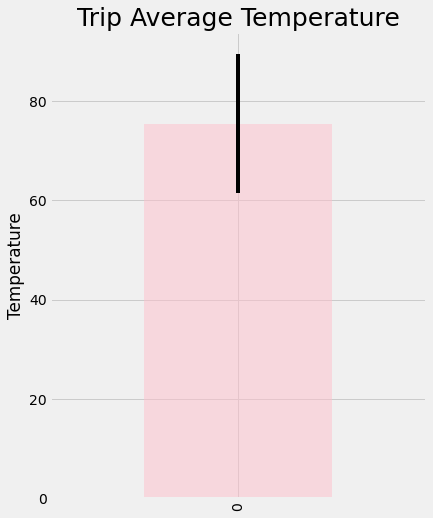

<Figure size 432x288 with 0 Axes>

In [23]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

trip_data = pd.DataFrame(trip_df, columns = ["Min Temperature", "Avg Temperature", "Max Temperature"])
avg_temp = trip_data["Avg Temperature"]
min_max_temp = trip_data.iloc[0]["Max Temperature"] - trip_data.iloc[0]["Min Temperature"]
avg_temp.plot(kind = "bar", yerr = min_max_temp, figsize = (6,8), alpha = 0.5, color = "pink")
plt.title("Trip Average Temperature", fontsize = 25)
plt.ylabel("Temperature")
plt.show()
plt.savefig("Images/TripTemperature.png")


In [24]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
active_stations = m_active_st
active_stations

station_list = []

for i in active_stations:
    station_list.append(i)
    
all_stations = session.query(measurement.station, func.sum(measurement.prcp), func.sum(measurement.tobs), station.name, station.latitude, station.longitude, station.elevation).\
                group_by(measurement.station).\
                order_by(func.sum(measurement.prcp).desc()).all()
all_stations

/opt/anaconda3/lib/python3.8/site-packages/sqlalchemy/sql/compiler.py:362: SAWarning: SELECT statement has a cartesian product between FROM element(s) "measurement" and FROM element "station".  Apply join condition(s) between each element to resolve.
  util.warn(message)


[('USC00516128', 9612.810000000345, 1667070.0, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00519281', 5297.7600000003895, 1787868.0, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00513117', 3443.5800000001063, 1772235.0, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00519523', 2661.120000000018, 1790613.0, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00514830', 2110.40999999993, 1483839.0, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00519397', 1184.5799999999226, 1827747.0, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00511918', 834.119999999968, 1275552.0, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00518838', 637.8299999999936, 334458.0, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00517948', 390.95999999999873, 922203.0, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)]

In [25]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [26]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date




startDate = "2017-05-03"
endDate = "2017-05-13"


startDate  = dt.datetime.strptime(startDate, '%Y-%m-%d')
trip_Length = 12

date_List = [dt.datetime.strftime(startDate + dt.timedelta(days = x), '%m-%d') 
            for x in range(0, trip_Length)]

# Loop through the list of %m-%d strings and calculate the normals for each date
trip_normals = [daily_normals(date) for date in date_List]
trip_normals


[[(67.0, 73.41071428571429, 84.0)],
 [(65.0, 73.59649122807018, 78.0)],
 [(67.0, 73.39655172413794, 79.0)],
 [(66.0, 73.14035087719299, 80.0)],
 [(64.0, 71.78846153846153, 79.0)],
 [(65.0, 72.18867924528301, 80.0)],
 [(67.0, 72.9322033898305, 79.0)],
 [(64.0, 73.3157894736842, 78.0)],
 [(65.0, 73.61111111111111, 79.0)],
 [(65.0, 73.13793103448276, 79.0)],
 [(67.0, 73.14285714285714, 79.0)],
 [(63.0, 73.89285714285714, 80.0)]]

In [27]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_normals = [np.array(normal[0]) for normal in trip_normals]
table = pd.DataFrame(trip_normals)
table["Date"] = date_List
table = table.set_index("Date")
table = table.rename(columns={0: "Low Temperature", 1: "Avg Temperature", 2: "High Temperature"})

table

,Low Temperature,Avg Temperature,High Temperature
Date,,,
05-03,67.0,73.410714,84.0
05-04,65.0,73.596491,78.0
05-05,67.0,73.396552,79.0
05-06,66.0,73.140351,80.0
05-07,64.0,71.788462,79.0
05-08,65.0,72.188679,80.0
05-09,67.0,72.932203,79.0
05-10,64.0,73.315789,78.0
05-11,65.0,73.611111,79.0


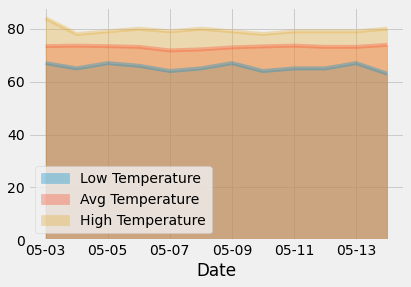

<Figure size 432x288 with 0 Axes>

In [29]:
# Plot the daily normals as an area plot with `stacked=False`
table.plot.area(stacked = False , alpha = 0.35)
plt.show()
plt.savefig("Images/daily-normals.png")
